In [1]:
import os
import numpy as np
import pandas as pd

import prepare_data

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
data_path = os.path.join("ICHI14_dataset\data")
patient_list = ['002','003','005','007','08a','08b','09a','09b', '10a','011','013','014','15a','15b','016',
            '017','018','019','020','021','022','023','025','026','027','028','029','030','031','032',
            '033','034','035','036','037','038','040','042','043','044','045','047','048','049','051']
statistics_list = ["std_x", "std_y", "std_z"]
file_name = "multy_3_class_features_60s.csv"

In [3]:
#prepare_data.save_statistic_features(patient_list, sorce_path="ICHI14_dataset\data", 
#                                     save_path="multy_3_class_features_60s.csv",
#                                     window_len=60, sleep_stages=True)

In [4]:
train_patient_list, test_patient_list = train_test_split(patient_list, random_state=152, test_size=0.3)

In [5]:
X_train, y_train = prepare_data.load_statistic_features(train_patient_list, file_name=file_name)
X_test, y_test = prepare_data.load_statistic_features(test_patient_list, file_name=file_name)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15850, 3)
(15850,)
(7355, 3)
(7355,)


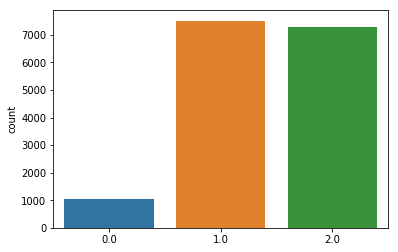

In [7]:
sns.countplot(y_train)

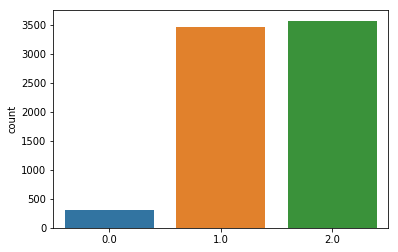

In [8]:
sns.countplot(y_test)

### 1. Lin. Reg, only one window

In [12]:
%%time
model1 = LogisticRegression()
model1.fit(X_train, y_train)

Wall time: 42.9 ms


In [13]:
y_predict = model1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model1.predict(X_test)

print("\nTrain set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      1058
        1.0       0.56      0.91      0.69      7514
        2.0       0.80      0.40      0.53      7278

avg / total       0.63      0.61      0.57     15850

Confussion matrix: 
 [[   0  984   74]
 [   0 6855  659]
 [   0 4397 2881]]

Accuracy on train set:  0.6142586750788643

Train set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       314
        1.0       0.57      0.90      0.70      3465
        2.0       0.81      0.44      0.57      3576

avg / total       0.67      0.64      0.61      7355

Confussion matrix: 
 [[   0  298   16]
 [   0 3124  341]
 [   0 2016 1560]]

Accuracy on train set:  0.6368456832087016


C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2. Lin. Reg, several windows features for one window

In [14]:
X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                 file_name=file_name,
                                                                 n_others_windows=16)

X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=16)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15354, 51)
(15354,)
(7131, 51)
(7131,)


In [16]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_predict = model3.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model3.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      1058
        1.0       0.63      0.86      0.73      7514
        2.0       0.77      0.59      0.67      6782

avg / total       0.65      0.68      0.65     15354

Confussion matrix: 
 [[   0  924  134]
 [   0 6459 1055]
 [   0 2803 3979]]

Accuracy on train set:  0.6798228474664583

Test set result: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       314
        1.0       0.67      0.84      0.75      3457
        2.0       0.80      0.66      0.72      3360

avg / total       0.70      0.72      0.70      7131

Confussion matrix: 
 [[   0  290   24]
 [   0 2915  542]
 [   0 1146 2214]]

Accuracy on test set:  0.7192539615762166


C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\My_programs\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### The problem is imbalanced classes 

## OVERSAMPLING

In [13]:
train_size = y_train.shape[0]

awake = np.sum(y_train[y_train == 2]) / 2
rem = np.sum(y_train[y_train == 0] + 1)
no_rem = np.sum(y_train[y_train == 1])


print(awake)
print(rem)
print(no_rem)

6661.0
1058.0
7511.0


In [14]:
print(awake / train_size)
print(rem / train_size)
print(no_rem / train_size)

0.43736047275114903
0.06946815495732107
0.49317137229152985


In [15]:
def n_repeats(y):
    train_size = y.shape[0]
    repeats = np.zeros(y.shape)
    
    awake = np.sum(y_train[y_train == 2]) / 2
    rem = np.sum(y_train[y_train == 0] + 1)
    no_rem = np.sum(y_train[y_train == 1])
    
    repeats[y == 2] = 1
    repeats[y == 0] = no_rem // rem
    repeats[y == 1] = 1
    
    return repeats.astype(int)

In [30]:
repeats = n_repeats(y_train)

In [31]:
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)

In [32]:
print(y_train.shape)
print(X_train.shape)

(22198,)
(22198, 3)


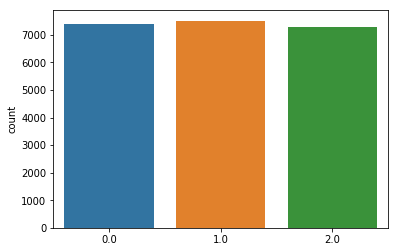

In [33]:
sns.countplot(y_train)

### 3. Lin. Reg, only one window

In [34]:
%%time
model1 = LogisticRegression(C=0.1)
model1.fit(X_train, y_train)

Wall time: 61.8 ms


In [35]:
y_predict = model1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model1.predict(X_test)

print("\nTrain set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.40      0.76      0.52      7406
        1.0       0.36      0.18      0.24      7514
        2.0       0.70      0.40      0.51      7278

avg / total       0.48      0.45      0.42     22198

Confussion matrix: 
 [[5656 1176  574]
 [5491 1345  678]
 [3096 1241 2941]]

Accuracy on train set:  0.44787818722407424

Train set result: 
             precision    recall  f1-score   support

        0.0       0.06      0.80      0.11       314
        1.0       0.53      0.17      0.26      3465
        2.0       0.81      0.45      0.58      3576

avg / total       0.65      0.33      0.41      7355

Confussion matrix: 
 [[ 250   47   17]
 [2522  597  346]
 [1495  485 1596]]

Accuracy on train set:  0.3321549966009517


f1 = 0.41, acc = 0.3321,

### 4. Lin. Reg, several windows features for one window

(21206, 99)
(21206,)
(6907, 99)
(6907,)


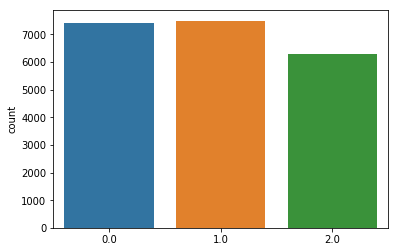

In [40]:
X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                 file_name=file_name,
                                                                 n_others_windows=32)

X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=32)

repeats = n_repeats(y_train)
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)
sns.countplot(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#Y_train = np_utils.to_categorical(y_train, 5)
#print(Y_train.shape)
#Y_test = np_utils.to_categorical(y_test, 5)
#print(Y_test.shape)

In [41]:
%%time
model3 = LogisticRegression()
model3.fit(X_train, y_train)

Wall time: 1.38 s


In [42]:
y_predict = model3.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model3.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.52      0.58      0.55      7406
        1.0       0.49      0.50      0.50      7497
        2.0       0.69      0.57      0.62      6303

avg / total       0.56      0.55      0.55     21206

Confussion matrix: 
 [[4277 2422  707]
 [2795 3783  919]
 [1202 1523 3578]]

Accuracy on train set:  0.5488069414316703

Test set result: 
             precision    recall  f1-score   support

        0.0       0.07      0.46      0.12       312
        1.0       0.70      0.50      0.58      3446
        2.0       0.82      0.62      0.71      3149

avg / total       0.73      0.55      0.62      6907

Confussion matrix: 
 [[ 145  152   15]
 [1315 1726  405]
 [ 601  586 1962]]

Accuracy on test set:  0.5549442594469379


f1 = 0.60, acc = 0.5387, 16 windows

f1 = 0.62, acc = 0.5549, 32 windows

### 5. GradientBoostingClassifier, several windows features for one window

In [45]:
%%time
model4 = GradientBoostingClassifier(n_estimators=30, max_depth=6)
model4.fit(X_train, y_train)

Wall time: 42.7 s


In [46]:
y_predict = model4.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model4.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.77      0.93      0.84      7406
        1.0       0.72      0.75      0.73      7497
        2.0       0.85      0.60      0.70      6303

avg / total       0.78      0.77      0.76     21206

Confussion matrix: 
 [[6895  441   70]
 [1304 5608  585]
 [ 744 1777 3782]]

Accuracy on train set:  0.7679430349900972

Test set result: 
             precision    recall  f1-score   support

        0.0       0.07      0.29      0.12       312
        1.0       0.68      0.66      0.67      3446
        2.0       0.83      0.61      0.70      3149

avg / total       0.72      0.62      0.66      6907

Confussion matrix: 
 [[  90  211   11]
 [ 791 2268  387]
 [ 360  869 1920]]

Accuracy on test set:  0.6193716519472998


f1-score = 0.67, acc = 0.6452, n_estimators=30, max_depth=6, 32 windows

f1-score = 0.66, acc = 0.6193, n_estimators=30, max_depth=5, 32 windows

### 6. SVM, several windows features for one window

In [ ]:
%%time
model6 = SVC(C=0.5)
model6.fit(X_train, y_train)

In [ ]:
y_predict = model6.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model6.predict(X_test)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)

### 7. RNN, several windows features for one window

In [10]:

from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Activation, Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from keras.layers import LSTM, Bidirectional

from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.utils import np_utils

In [11]:
train_patient_list, test_patient_list = train_test_split(patient_list, random_state=152, test_size=0.3)
test_patient_list, valid_patient_list = train_test_split(test_patient_list, random_state=151, test_size=0.5)

(21578, 21, 3)
(21578,)
(3567, 21, 3)
(3567,)
(3508, 21, 3)
(3508,)
One-hot shapes:
(21578, 3)
(3567, 3)
(3508, 3)


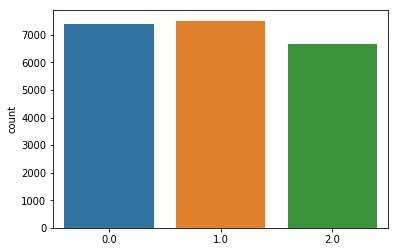

In [29]:
X_train, y_train = prepare_data.load_stat_features_others_windows_rnn(train_patient_list,
                                                                 file_name=file_name,
                                                                 n_others_windows=20)

X_valid, y_valid = prepare_data.load_stat_features_others_windows_rnn(valid_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=20)


X_test, y_test = prepare_data.load_stat_features_others_windows_rnn(test_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=20)

repeats = n_repeats(y_train)
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)
sns.countplot(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

print("One-hot shapes:")
Y_train = np_utils.to_categorical(y_train, 3)
print(Y_train.shape)
Y_valid = np_utils.to_categorical(y_valid, 3)
print(Y_valid.shape)
Y_test = np_utils.to_categorical(y_test, 3)
print(Y_test.shape)

In [107]:
RNN = Sequential()

#model.add(Bidirectional(layer=LSTM(25, dropout=0.2, recurrent_dropout=0.2) ,input_shape=(9, 12)))
#model.add(Dense(100, activation="relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation="relu"))

RNN.add(LSTM(10, dropout=0.1, recurrent_dropout=0.1, input_shape=(21, 3)))
RNN.add(Dense(3, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=l2(0.01)))

RNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(RNN.summary())

callbacks = [ModelCheckpoint('RNN_multy_3_weights.hdf5', monitor='val_acc', save_best_only=True), 
             EarlyStopping(monitor='val_loss', patience=4)]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
%%time

RNN.fit(X_train, Y_train,
       shuffle=True,
       batch_size=32, 
       epochs=10, 
       validation_data=(X_valid, Y_valid), 
       callbacks=callbacks,
       verbose=1)

Train on 21578 samples, validate on 3567 samples
Epoch 1/10
21578/21578 [==============================] - 56s 3ms/step - loss: 1.0275 - acc: 0.4620 - val_loss: 0.9259 - val_acc: 0.6095
Epoch 2/10
21578/21578 [==============================] - 35s 2ms/step - loss: 0.9802 - acc: 0.4914 - val_loss: 0.9245 - val_acc: 0.6431
Epoch 3/10
21578/21578 [==============================] - 78s 4ms/step - loss: 0.9715 - acc: 0.5030 - val_loss: 0.9036 - val_acc: 0.5357
Epoch 4/10
21578/21578 [==============================] - 36s 2ms/step - loss: 0.9648 - acc: 0.5057 - val_loss: 0.9516 - val_acc: 0.3661
Epoch 5/10
21578/21578 [==============================] - 35s 2ms/step - loss: 0.9603 - acc: 0.5079 - val_loss: 0.9410 - val_acc: 0.4460
Epoch 6/10
21578/21578 [==============================] - 36s 2ms/step - loss: 0.9552 - acc: 0.5108 - val_loss: 0.9461 - val_acc: 0.3981
Epoch 7/10
21578/21578 [==============================] - 39s 2ms/step - loss: 0.9526 - acc: 0.5152 - val_loss: 0.9218 - val_acc:

### NN 2

(21578, 63)
(21578,)
(3567, 63)
(3567,)
(3508, 63)
(3508,)
One-hot shapes
(21578, 3)
(3567, 3)
(3508, 3)


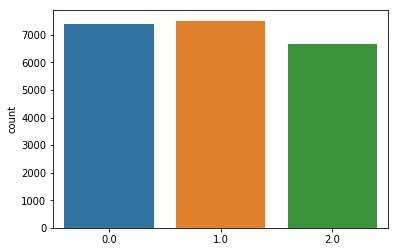

In [30]:
X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                 file_name=file_name,
                                                                 n_others_windows=20)

X_valid, y_valid = prepare_data.load_stat_features_others_windows(valid_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=20)


X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list, 
                                                                file_name=file_name, 
                                                                n_others_windows=20)

repeats = n_repeats(y_train)
y_train = np.repeat(y_train, repeats, axis=0)
X_train = np.repeat(X_train, repeats, axis=0)
sns.countplot(y_train)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

print("One-hot shapes")
Y_train = np_utils.to_categorical(y_train, 3)
print(Y_train.shape)
Y_valid = np_utils.to_categorical(y_valid, 3)
print(Y_valid.shape)
Y_test = np_utils.to_categorical(y_test, 3)
print(Y_test.shape)

In [42]:
NN = Sequential()
NN.add(Dense(12, input_shape=(63,), activation='relu', kernel_regularizer=l2(0.02)))
NN.add(Dense(8, activation='relu', kernel_regularizer=l2(0.02)))
NN.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.02)))

NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [ModelCheckpoint('NN2_multy_3_weights.model',
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True)]

print(NN.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 12)                768       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 27        
Total params: 899
Trainable params: 899
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
%%time

NN.fit(X_train, Y_train,
       shuffle=True,
       batch_size=32, 
       epochs=30, 
       validation_data=(X_valid, Y_valid), 
       callbacks=callbacks,
       verbose=1)

Train on 21578 samples, validate on 3567 samples
Epoch 1/30
21578/21578 [==============================] - 4s 187us/step - loss: 1.3230 - acc: 0.4619 - val_loss: 0.9733 - val_acc: 0.6333

Epoch 00001: val_loss improved from inf to 0.97332, saving model to NN2_multy_3_weights.model
Epoch 2/30
21578/21578 [==============================] - 3s 157us/step - loss: 1.0158 - acc: 0.5053 - val_loss: 0.9015 - val_acc: 0.6033

Epoch 00002: val_loss improved from 0.97332 to 0.90154, saving model to NN2_multy_3_weights.model
Epoch 3/30
21578/21578 [==============================] - 4s 163us/step - loss: 0.9734 - acc: 0.5065 - val_loss: 0.9242 - val_acc: 0.4951

Epoch 00003: val_loss did not improve from 0.90154
Epoch 4/30
21578/21578 [==============================] - 28s 1ms/step - loss: 0.9641 - acc: 0.5048 - val_loss: 0.9069 - val_acc: 0.4979

Epoch 00004: val_loss did not improve from 0.90154
Epoch 5/30
21578/21578 [==============================] - 6s 295us/step - loss: 0.9603 - acc: 0.5051 -

In [44]:
scores = NN.evaluate(X_test, Y_test)
print("Test accuracy =", scores[1])

3508/3508 [==============================] - 1s 165us/step
Test accuracy = 0.48945267958950966


In [45]:
y_predict = np.argmax(NN.predict(X_test), axis=1)

In [46]:
metrics.f1_score(y_test, y_predict, average='micro')  

0.48945267958950966

In [47]:
metrics.f1_score(y_test, y_predict, average='macro')  

0.43281150813724095

In [48]:
metrics.f1_score(y_test, y_predict, average='weighted')  

0.5571409726244233

In [50]:
y_predict = np.argmax(NN.predict(X_train), axis=1)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = np.argmax(NN.predict(X_test), axis=1)

print("\nTest set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.47      0.58      0.52      7406
        1.0       0.44      0.42      0.43      7511
        2.0       0.72      0.56      0.63      6661

avg / total       0.54      0.52      0.52     21578

Confussion matrix: 
 [[4312 2485  609]
 [3522 3147  842]
 [1379 1561 3721]]

Accuracy on train set:  0.5181203077208267

Test set result: 
             precision    recall  f1-score   support

        0.0       0.07      0.58      0.13       164
        1.0       0.62      0.35      0.45      1756
        2.0       0.84      0.63      0.72      1588

avg / total       0.69      0.49      0.56      3508

Confussion matrix: 
 [[  95   61    8]
 [ 956  615  185]
 [ 266  315 1007]]

Accuracy on test set:  0.48945267958950966


## Cross validation

In [118]:
kf = KFold(n_splits=5, random_state=5, shuffle=True) # Define the split - into 3 folds #5
kf.get_n_splits(patient_list) # returns the number of splitting iterations in the cross-validator

5

In [119]:
for train_index, test_index in kf.split(patient_list):
    #train_patient_list = [patient_list[i] for i in train_index]
    test_patient_list = [patient_list[i] for i in test_index]
    
    print(test_patient_list)

['007', '08a', '09a', '025', '028', '029', '031', '044', '048']
['002', '005', '08b', '021', '026', '027', '032', '034', '049']
['003', '013', '014', '15b', '020', '022', '035', '036', '045']
['09b', '15a', '017', '019', '023', '037', '042', '047', '051']
['10a', '011', '016', '018', '030', '033', '038', '040', '043']


In [122]:
n_others_windows = 32

### 1. Gradient Boosting Classifier

In [136]:
%%time
accuracy_list = []
f1_list = []
for train_index, test_index in kf.split(patient_list):
    train_patient_list = [patient_list[i] for i in train_index]
    test_patient_list = [patient_list[i] for i in test_index]
    
    X_train, y_train = prepare_data.load_stat_features_others_windows(train_patient_list,
                                                                      file_name=file_name,
                                                                      n_others_windows=n_others_windows)
    X_test, y_test = prepare_data.load_stat_features_others_windows(test_patient_list,
                                                                    file_name=file_name, 
                                                                    n_others_windows=n_others_windows)
    
    
    repeats = n_repeats(y_train)
    y_train = np.repeat(y_train, repeats, axis=0)
    X_train = np.repeat(X_train, repeats, axis=0)
    print(X_train.shape)
    
    model3 = GradientBoostingClassifier(n_estimators=30, max_depth=5)
    model3.fit(X_train, y_train)
    
    y_predict = model3.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, y_predict)
    f1_train = metrics.f1_score(y_train, y_predict, average="weighted")
    print("\nAccuracy on train set: ", accuracy_train)
    print("F1 score on train set: ", f1_train)
    
    y_predict = model3.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    f1_test = metrics.f1_score(y_test, y_predict, average="weighted")
    accuracy_list.append(accuracy)
    print(metrics.classification_report(y_test, y_predict))
    f1_list.append(f1_test)
    print("Accuracy on test set: ", accuracy)
    print("F1 score on test set: ", f1_test)
    
    #print(metrics.classification_report(y_test, y_predict))
    #print(test_patient_list)

print("\nMean accuracy =", np.mean(accuracy_list))  
print("\nMean f1 score =", np.mean(f1_list)) 

(24563, 99)

Accuracy on train set:  0.7594349224443269
F1 score on train set:  0.7585610311418581
             precision    recall  f1-score   support

        0.0       0.04      0.13      0.06       200
        1.0       0.56      0.67      0.61      1975
        2.0       0.78      0.46      0.58      2047

avg / total       0.65      0.54      0.57      4222

Accuracy on test set:  0.5402652771198484
F1 score on test set:  0.5693045823484824
(24734, 99)

Accuracy on train set:  0.7680116438910003
F1 score on train set:  0.7609076267388633
             precision    recall  f1-score   support

        0.0       0.11      0.38      0.17       269
        1.0       0.60      0.57      0.58      2026
        2.0       0.80      0.62      0.70      2443

avg / total       0.67      0.59      0.62      4738

Accuracy on test set:  0.5850569860700717
F1 score on test set:  0.6196629051015272
(24235, 99)

Accuracy on train set:  0.7610068083350526
F1 score on train set:  0.7582146083816832

f1 = 0.6170, acc = 0.5884, n_estimators=30, max_depth=5